In [35]:
import pandas as pd
import numpy as np
import praw
import datetime
from matplotlib import pyplot as plt
from collections import defaultdict

In [3]:
# hide my api access stuff
auth = open("secret", "r").read().split('|')
CLIENT_ID = auth[0]
SECRET_KEY = auth[1]

In [75]:
# make a PRAW reddit instance
reddit = praw.Reddit (
    client_id=CLIENT_ID,
    client_secret=SECRET_KEY,
    user_agent="uhhh idk",
)

USER_ONE = 'jmct' #professor
# USER_TWO = 'ariqbailey'
# USER_ONE = 'ariqbailey'

# get users account creation dates
user_one_creation = reddit.redditor(USER_ONE).created_utc
user_two_creation = reddit.redditor(USER_TWO).created_utc

In [76]:
# get users comments
LIMIT = None
user_one_comments = reddit.redditor(USER_ONE).comments.new(limit=LIMIT)
one_comment_df = pd.DataFrame(columns=['body', 'body_length', 'subreddit', 'created_utc'])

i = 0
for comment in user_one_comments:
    one_comment_df.loc[i] = [comment.body, len(comment.body), comment.subreddit, comment.created_utc]
    i += 1

In [77]:
one_comment_df.head()

,body,body_length,subreddit,created_utc
0,This is hilarious! Loved the quip about cuttin...,81,OCPoetry,1.619289e+09
1,This is very nicely done. Good job!,35,UMD,1.619274e+09
2,Anyone know if this feature has rolled out to ...,77,kindle,1.618535e+09
3,Ah thank you,12,UMD,1.618440e+09
4,What’s mmWave for the uninitiated? Is that the...,86,UMD,1.618440e+09


In [78]:
# add date column
one_comment_df['date'] = [None] * len(one_comment_df)

# add standard date
for i,r in one_comment_df.iterrows():
    one_comment_df.at[i, 'date'] = datetime.datetime.fromtimestamp(r['created_utc'])

In [79]:
one_comment_df.head(n=50)

,body,body_length,subreddit,created_utc,date
0,This is hilarious! Loved the quip about cuttin...,81,OCPoetry,1.619289e+09,2021-04-24 14:29:26
1,This is very nicely done. Good job!,35,UMD,1.619274e+09,2021-04-24 10:17:05
2,Anyone know if this feature has rolled out to ...,77,kindle,1.618535e+09,2021-04-15 20:59:52
3,Ah thank you,12,UMD,1.618440e+09,2021-04-14 18:45:37
4,What’s mmWave for the uninitiated? Is that the...,86,UMD,1.618440e+09,2021-04-14 18:34:21
5,Best sunsets anywhere,21,newjersey,1.618423e+09,2021-04-14 13:54:03
6,So many childhood memories getting ice cream a...,80,newjersey,1.617995e+09,2021-04-09 15:10:23
7,Thomas sweet blend ins goat. Halo pub is a cla...,80,newjersey,1.617995e+09,2021-04-09 15:08:18
8,"Dealers choice? Otherwise, thank you for check...",50,audible,1.617931e+09,2021-04-08 21:20:51
9,I would love to listen to All These Worlds. I’...,138,audible,1.617931e+09,2021-04-08 21:11:48


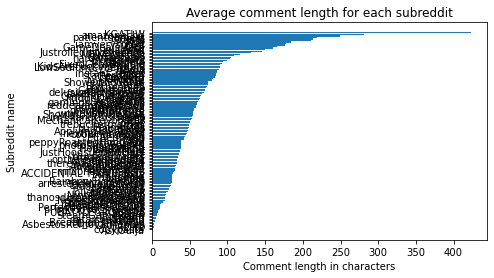

In [80]:
subreddits = {}
for i, r in one_comment_df.iterrows():
    if(not str(r['subreddit']) in subreddits):
        subreddits[str(r['subreddit'])] = [0, 0]

    subreddits[str(r['subreddit'])] = [subreddits[str(r['subreddit'])][0] + r['body_length'], subreddits[str(r['subreddit'])][1] + 1]

sub_avgs = {}
sub_avgs = defaultdict(lambda: 0, sub_avgs)

for k in subreddits:
    sub_avgs[k] = int(subreddits[k][0] / subreddits[k][1])

sub_names_sorted = []
sub_avgs_sorted = []
for i in sorted(sub_avgs.keys(), key=lambda x: sub_avgs[x]):
    sub_names_sorted.append(i)
    sub_avgs_sorted.append(sub_avgs[i])

plt.barh(sub_names_sorted, sub_avgs_sorted)
plt.title('Average comment length for each subreddit')
plt.xlabel('Comment length in characters')
plt.ylabel('Subreddit name')
plt.show()

Looking at this graph, we should therefore be able to create a weight with a linear relationship to comment_body_length

In [81]:
# generate weights proportional to average comment length for each subreddit
one_avg_comment_len = one_comment_df['body_length'].mean()

one_comment_df['length_weight'] = [None] * len(one_comment_df)

for i,r in one_comment_df.iterrows():
    one_comment_df.at[i, 'length_weight'] = r['body_length'] / one_avg_comment_len

one_comment_df.head()

,body,body_length,subreddit,created_utc,date,length_weight
0,This is hilarious! Loved the quip about cuttin...,81,OCPoetry,1.619289e+09,2021-04-24 14:29:26,1.16672
1,This is very nicely done. Good job!,35,UMD,1.619274e+09,2021-04-24 10:17:05,0.504139
2,Anyone know if this feature has rolled out to ...,77,kindle,1.618535e+09,2021-04-15 20:59:52,1.10911
3,Ah thank you,12,UMD,1.618440e+09,2021-04-14 18:45:37,0.172848
4,What’s mmWave for the uninitiated? Is that the...,86,UMD,1.618440e+09,2021-04-14 18:34:21,1.23874


Text(0, 0.5, 'Subreddit')

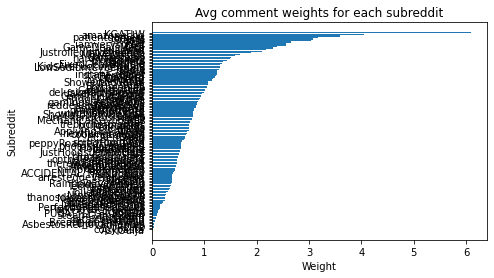

In [105]:
# print avg length_weight for each subreddit

subs_comment_weights = {}
subs_comment_weights = defaultdict(lambda: 0, subs_comment_weights)
for k in subreddits:
    sub_df = one_comment_df[one_comment_df.subreddit == k]
    subs_comment_weights[k] = sub_df['length_weight'].mean()

# {l: v for k,v in sorted(subs_comment_weights.items(), key=lambda item: item[1])}
sorted_comment_weights = sorted(subs_comment_weights.items(), key=lambda x: x[1])
    
x = []
y = []
for k, v in sorted_comment_weights:
    x.append(k)
    y.append(v)

plt.barh(x, y)
plt.title('Avg comment weights for each subreddit')
plt.xlabel('Weight')
plt.ylabel('Subreddit')

By comparing the shape of this with the previous graph, we can be happy that our weights properly reflect comment length.

In [83]:
# graph jazz vs apex lengends

# get users posts
user_one_posts = reddit.redditor(USER_ONE).submissions.new(limit=LIMIT)
one_post_df = pd.DataFrame(columns=['title', 'body', 'body_length', 'subreddit', 'created_utc'])

i = 0
for post in user_one_posts:
    one_post_df.at[i] = [post.title, post.selftext, len(post.selftext), post.subreddit, post.created_utc]
    i += 1

one_post_df.head()

# weight comments and weight posts appropriately
COMMENT_CONSTANT = 1.0
SUBMISSION_CONSTANT = 9.0

AVG_POST_LENGTH = NaN
AVG_COMMENT_LENGTH = NaN
ACCOUNT_AGE = NaN

In [ ]:
# comments/posts interest age